In [609]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [610]:
def get_nearest_power(data, start_time, end_time):
    # index = data.index.get_loc(timestamp,"nearest") #old version
    index_start = data.index.get_indexer([start_time], method='nearest')[0] #new version
    index_end = data.index.get_indexer([end_time], method='nearest')[0]

    power_log = data.reset_index()
    power_select = power_log.loc[index_start:index_end, ['time_stamp', 'power']]#one到two行，ac列
    time_list = power_select['time_stamp'].tolist()
    power_list = power_select['power'].tolist()

    return power_list, time_list

In [611]:
power_log = pd.read_csv("../metrics/energy_log/power_log_2023-04-13.csv", names=['time_stamp', 'power'])
power_log['time_stamp'] = pd.to_datetime(power_log['time_stamp'])
power_log.head()

time_stamp   power
0 2023-04-13 10:49:21.599  77.669
1 2023-04-13 10:49:22.443  78.338
2 2023-04-13 10:49:22.925  77.955
3 2023-04-13 10:49:23.415  78.434
4 2023-04-13 10:49:23.897  78.315

In [612]:
duration = power_log['time_stamp'][5]-power_log['time_stamp'][4]
duration

Timedelta('0 days 00:00:00.841000')

In [613]:
power_log = power_log.set_index('time_stamp')# Set date to index

In [614]:
codec = 'SVT-AV1'
metrics = pd.read_csv(f'../metrics/energy/YOUTUBE_UGC_1080P_{codec}_metrics_energy_repeat.csv')
metrics.head(8)

vid   category  resolution  width  height   pixfmt  \
0  Animation_1080P-05f8  Animation        1080   1920    1080  yuv420p   
1  Animation_1080P-05f8  Animation        1080   1920    1080  yuv420p   
2  Animation_1080P-05f8  Animation        1080   1920    1080  yuv420p   
3  Animation_1080P-05f8  Animation        1080   1920    1080  yuv420p   
4  Animation_1080P-05f8  Animation        1080   1920    1080  yuv420p   
5  Animation_1080P-05f8  Animation        1080   1920    1080  yuv420p   
6  Animation_1080P-05f8  Animation        1080   1920    1080  yuv420p   
7  Animation_1080P-05f8  Animation        1080   1920    1080  yuv420p   

   framrate  bitrate_rawvideo (kb/s)  bitrate_encoded (kb/s)       PSNR  ...  \
0      25.0                   622090                   27486  45.994384  ...   
1      25.0                   622090                   18323  44.159637  ...   
2      25.0                   622090                   12981  42.780976  ...   
3      25.0                   622090                    7822  40.996289  ...   
4      25.0                   622090                    4491  39.222075  ...   
5      25.0                   622090                    2759  37.663094  ...   
6      25.0                   622090                    1795  36.159910  ...   
7      25.0                   622090                    1207  34.569354  ...   

            start_time_decode             end_time_decode count_repeat  \
0  2023-04-18 17:40:56.011358  2023-04-18 17:41:01.844901           10   
1  2023-04-18 17:42:55.703967  2023-04-18 17:43:00.883091           10   
2  2023-04-18 17:44:47.470108  2023-04-18 17:44:52.109920           10   
3  2023-04-18 17:46:32.576190  2023-04-18 17:46:36.389364           10   
4  2023-04-18 17:48:11.125796  2023-04-18 17:48:14.279319           10   
5  2023-04-18 17:49:44.267084  2023-04-18 17:49:46.901745           10   
6  2023-04-18 17:51:12.048142  2023-04-18 17:51:14.378015           10   
7  2023-04-18 17:52:35.600528  2023-04-18 17:52:37.654316           10   

  target_encode_energy decode_energy total_energy  nearest_start_time_encode  \
0          1682.653895    658.408390  2341.062286    2023-04-18 17:39:13.723   
1          1664.847430    537.269242  2202.116672    2023-04-18 17:41:13.537   
2          1599.570438    498.083747  2097.654186    2023-04-18 17:43:12.630   
3          1508.861758    395.948618  1904.810376    2023-04-18 17:45:04.129   
4          1404.759518    287.966221  1692.725739    2023-04-18 17:46:48.505   
5          1316.793569    290.022246  1606.815815    2023-04-18 17:48:26.162   
6          1235.611905    232.795678  1468.407583    2023-04-18 17:49:58.705   
7          1188.834233    187.167032  1376.001265    2023-04-18 17:51:26.266   

   nearest_end_time_encode  nearest_start_time_decode  nearest_end_time_decode  
0  2023-04-18 17:40:50.010    2023-04-18 17:40:55.772  2023-04-18 17:41:02.015  
1  2023-04-18 17:42:50.709    2023-04-18 17:42:55.500  2023-04-18 17:43:00.638  
2  2023-04-18 17:44:42.985    2023-04-18 17:44:47.307  2023-04-18 17:44:52.113  
3  2023-04-18 17:46:28.790    2023-04-18 17:46:32.637  2023-04-18 17:46:36.485  
4  2023-04-18 17:48:07.874    2023-04-18 17:48:11.243  2023-04-18 17:48:14.130  
5  2023-04-18 17:49:41.346    2023-04-18 17:49:44.235  2023-04-18 17:49:47.122  
6  2023-04-18 17:51:09.437    2023-04-18 17:51:11.843  2023-04-18 17:51:14.244  
7  2023-04-18 17:52:33.625    2023-04-18 17:52:35.548  2023-04-18 17:52:37.471  

[8 rows x 24 columns]

In [615]:
vid_uniques = metrics['vid'].unique()
vid_uniques

array(['Animation_1080P-05f8', 'Animation_1080P-3d67',
       'Animation_1080P-646f', 'TelevisionClip_1080P-3d83',
       'TelevisionClip_1080P-5278', 'TelevisionClip_1080P-68c6'],
      dtype=object)

In [616]:
metrics['start_time_encode'] = pd.to_datetime(metrics['start_time_encode'])
metrics['end_time_encode'] = pd.to_datetime(metrics['end_time_encode'])

Animation_1080P-05f8
QP level: 12


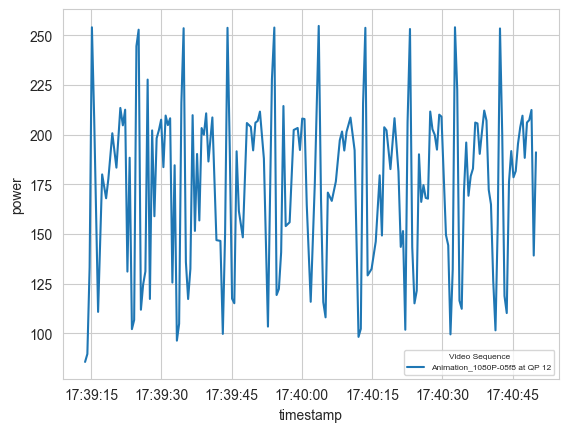

QP level: 18


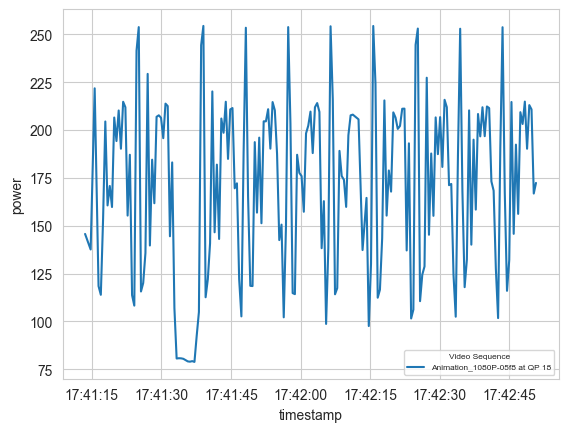

QP level: 24


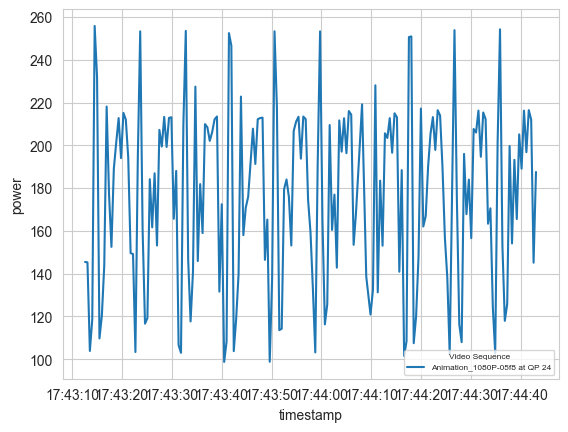

QP level: 30


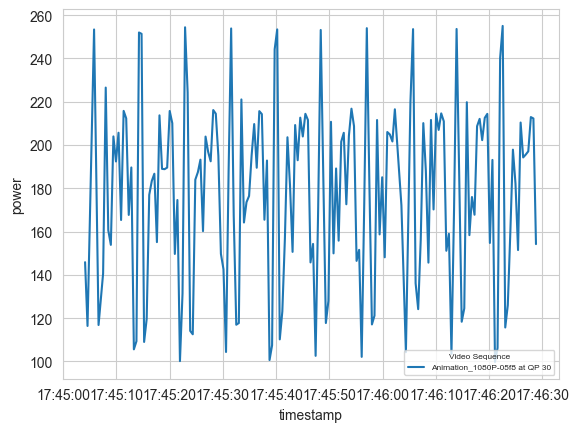

QP level: 36


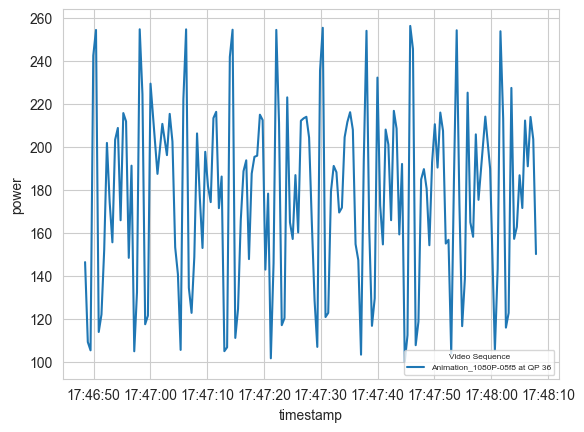

QP level: 42


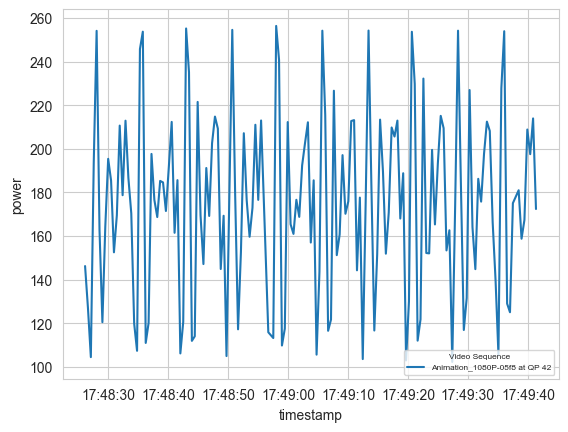

QP level: 48


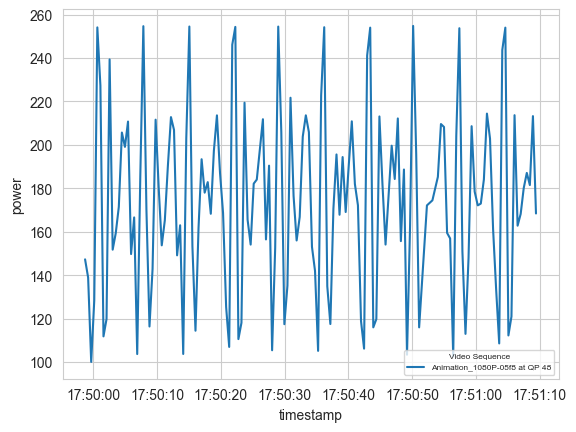

QP level: 54


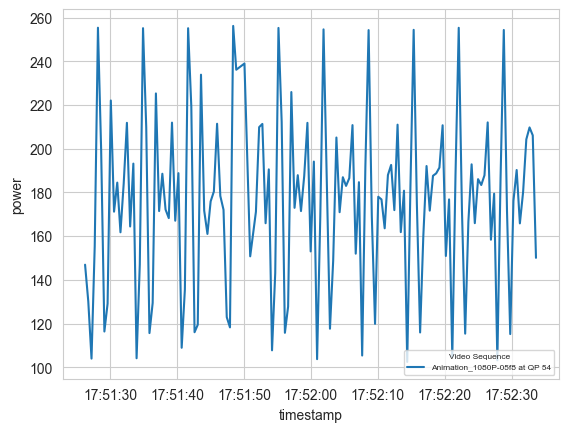

QP level: 60


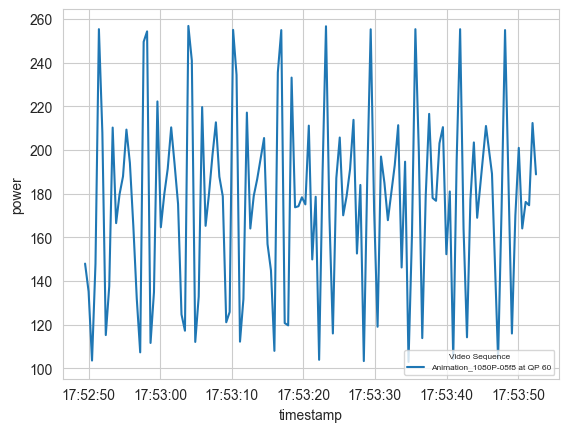

Animation_1080P-3d67
QP level: 12


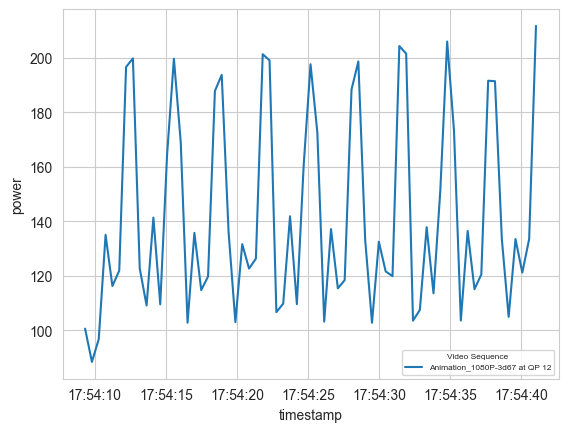

QP level: 18


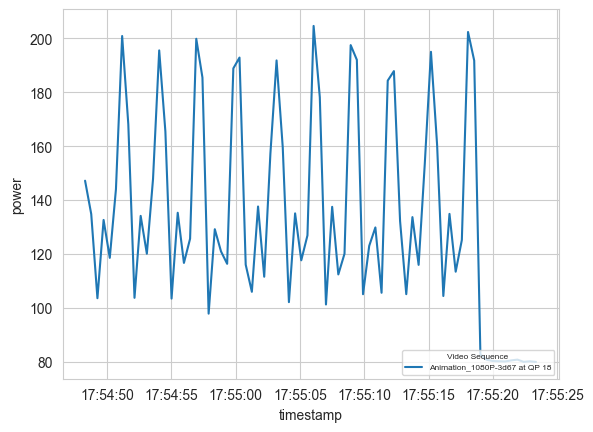

QP level: 24


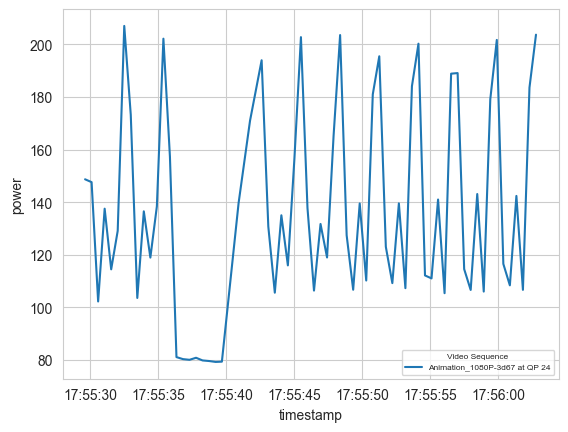

QP level: 30


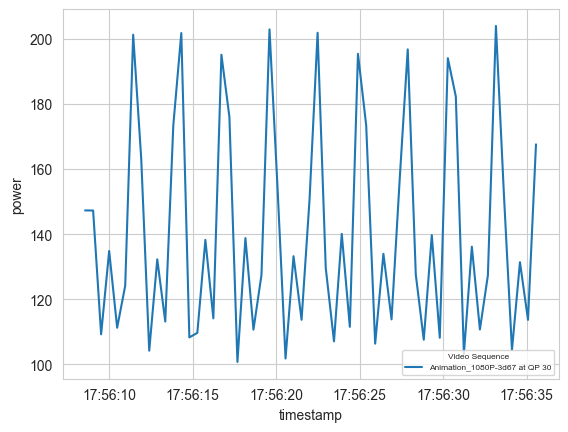

QP level: 36


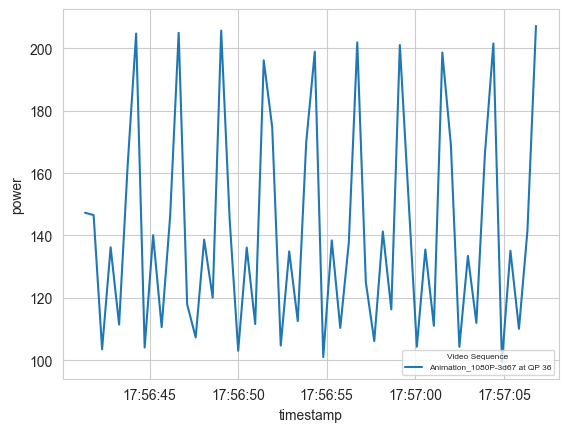

QP level: 42


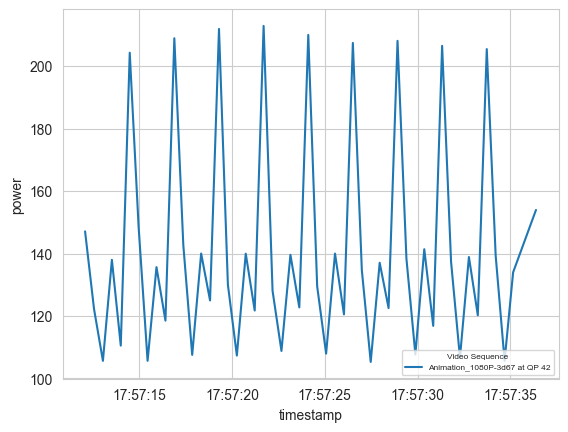

QP level: 48


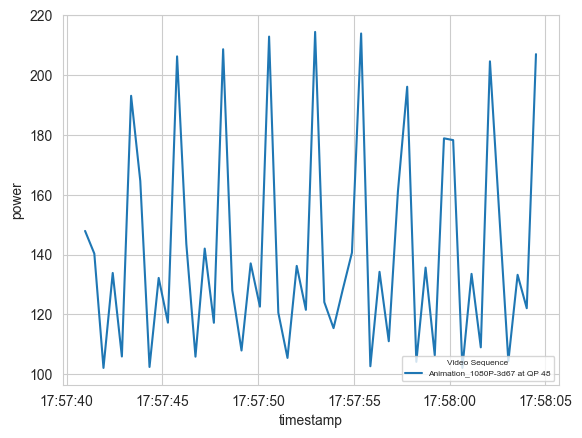

QP level: 54


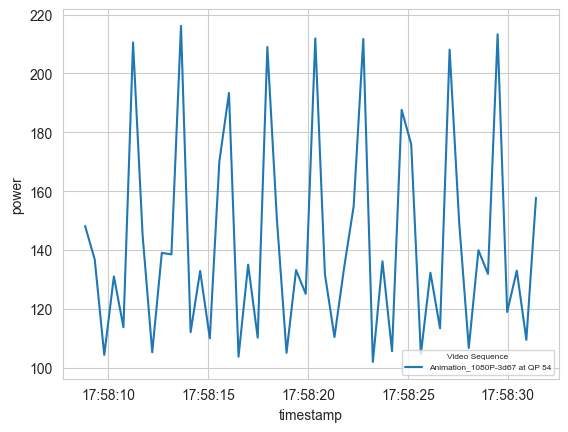

QP level: 60


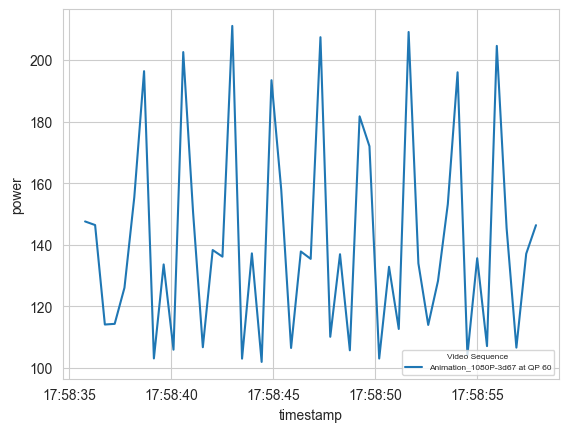

Animation_1080P-646f
QP level: 12


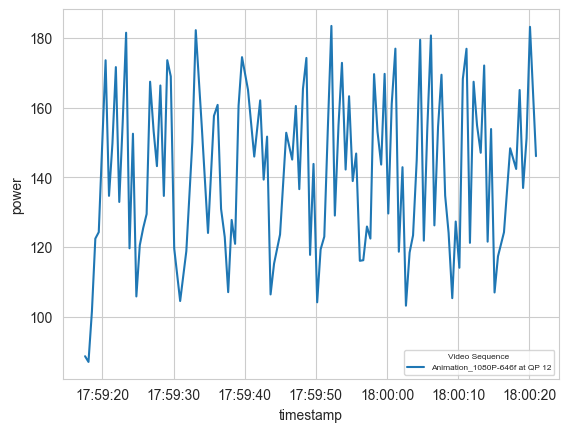

QP level: 18


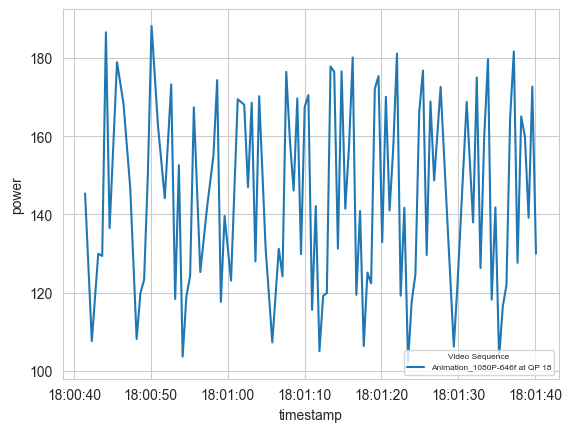

QP level: 24


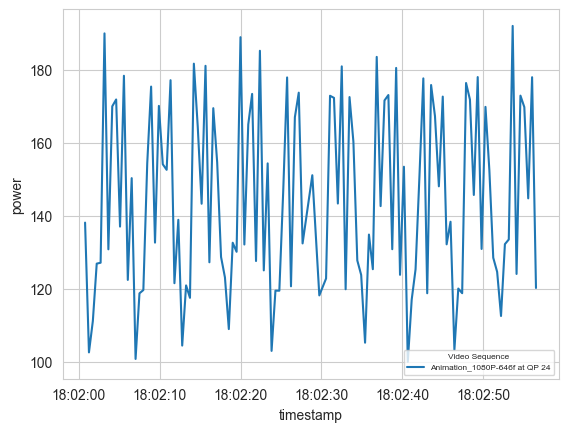

QP level: 30


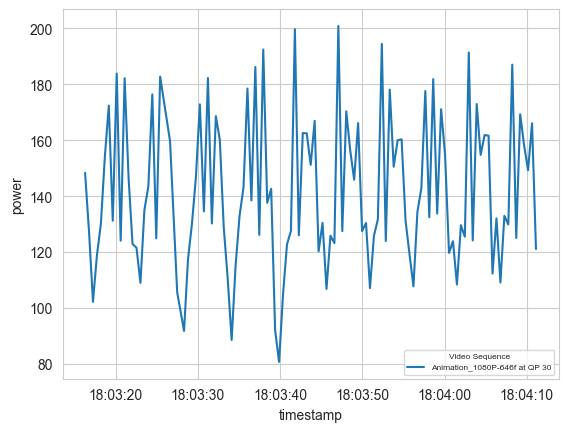

QP level: 36


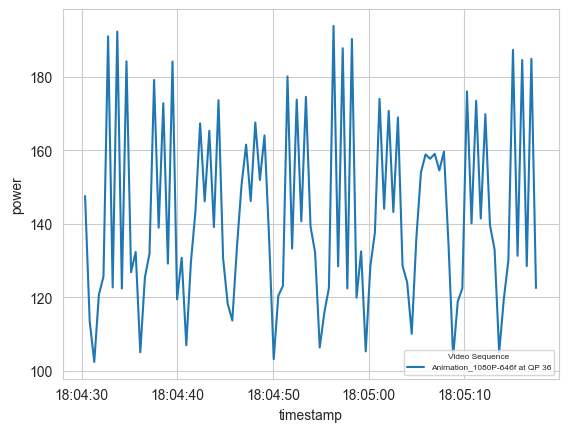

QP level: 42


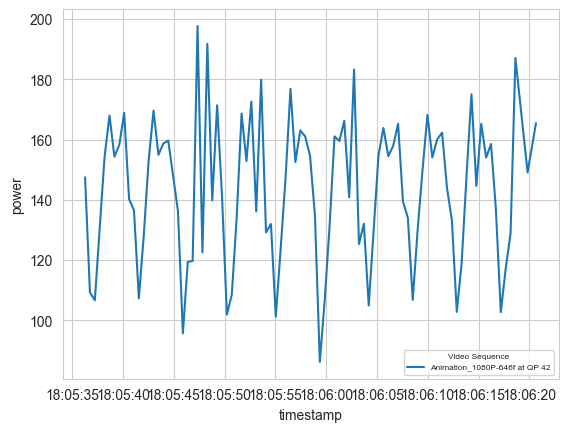

QP level: 48


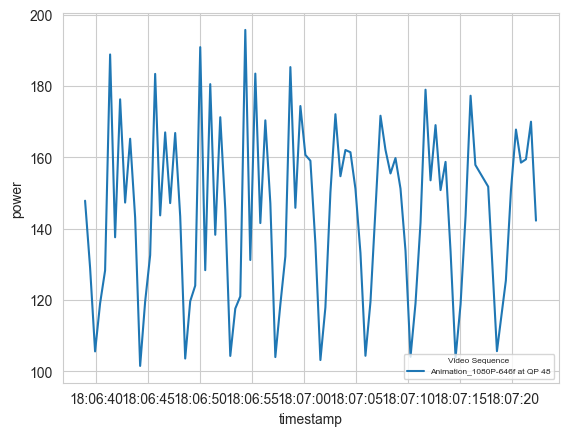

QP level: 54


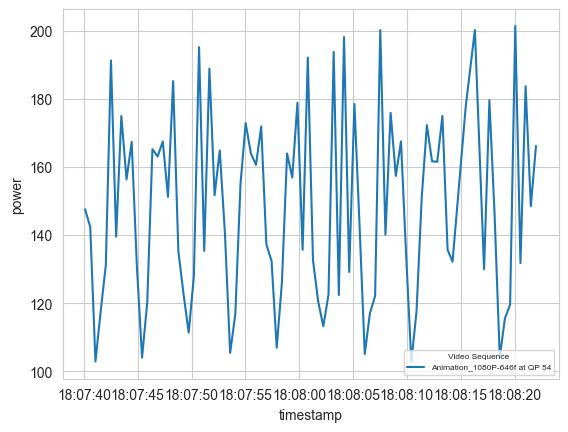

QP level: 60


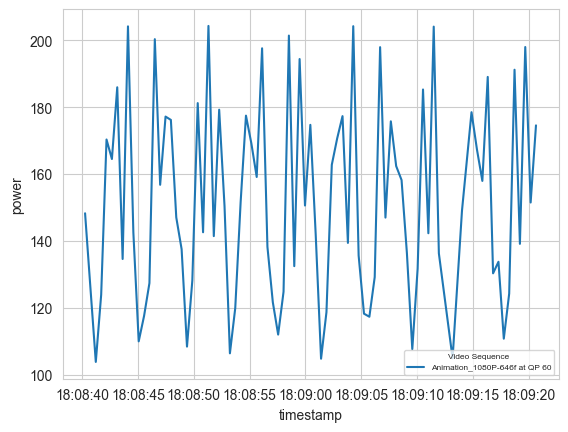

TelevisionClip_1080P-3d83
QP level: 12


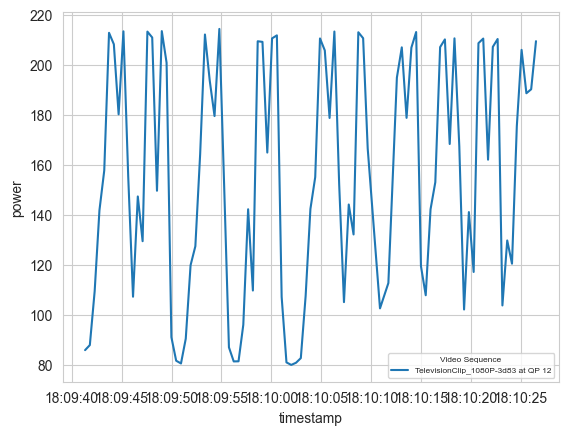

QP level: 18


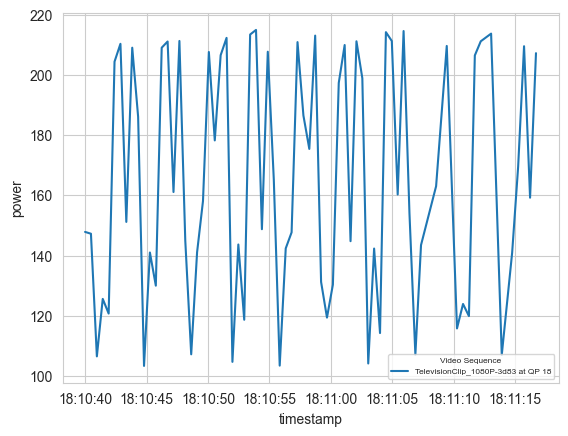

QP level: 24


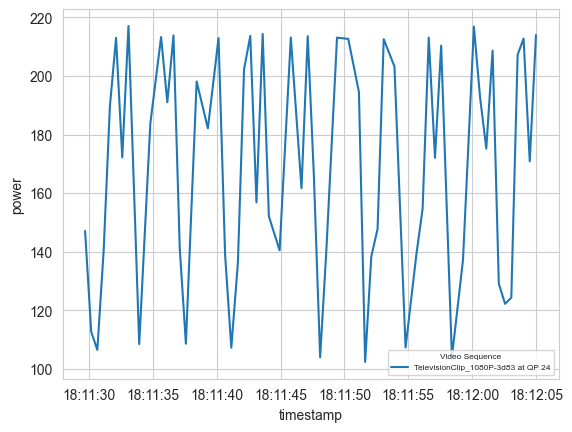

QP level: 30


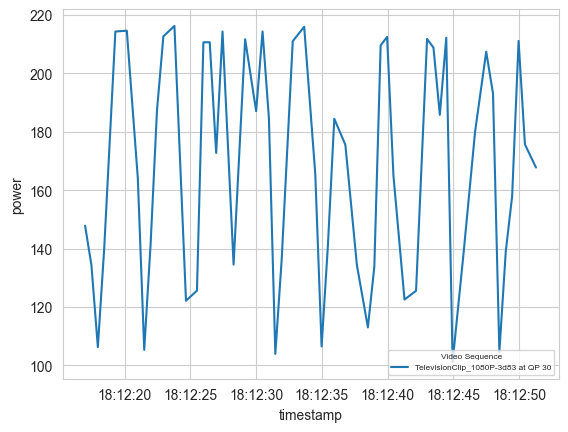

QP level: 36


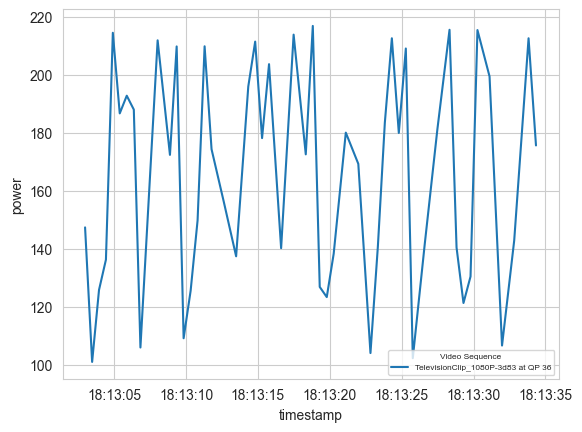

QP level: 42


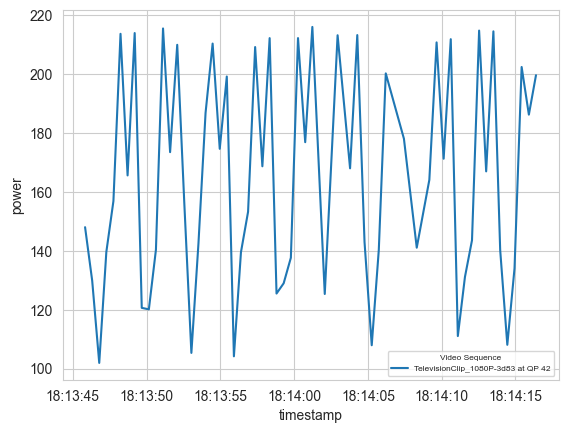

QP level: 48


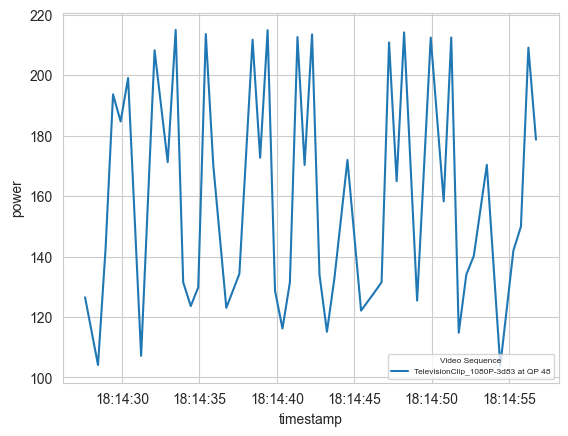

QP level: 54


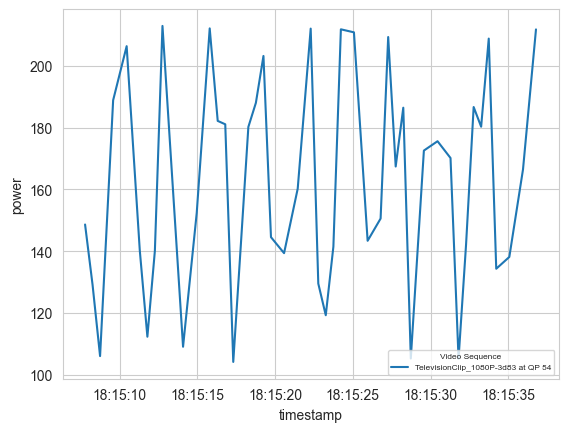

QP level: 60


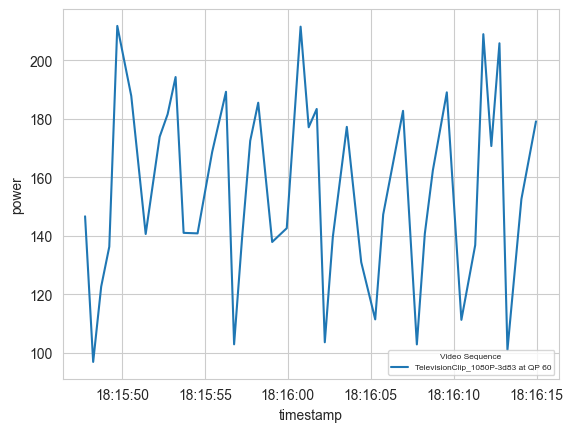

TelevisionClip_1080P-5278
QP level: 12


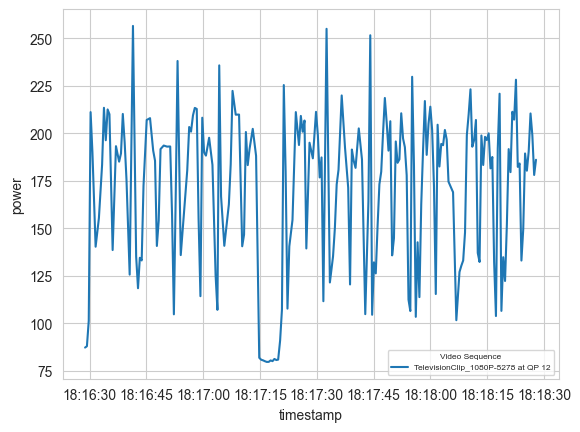

QP level: 18


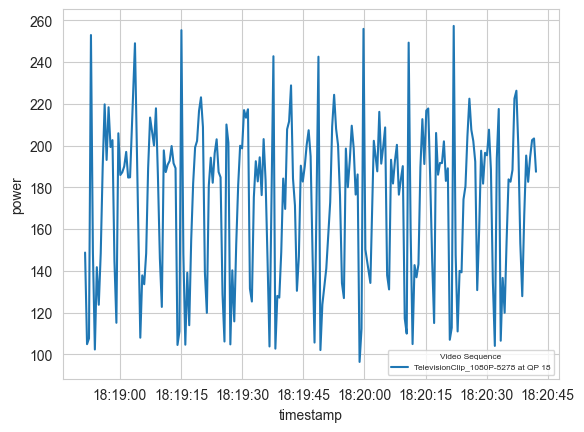

QP level: 24


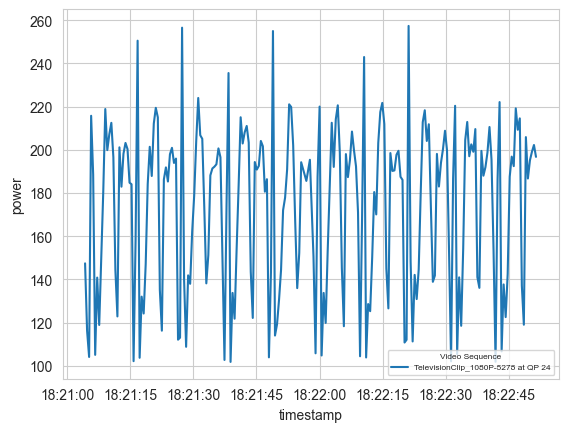

QP level: 30


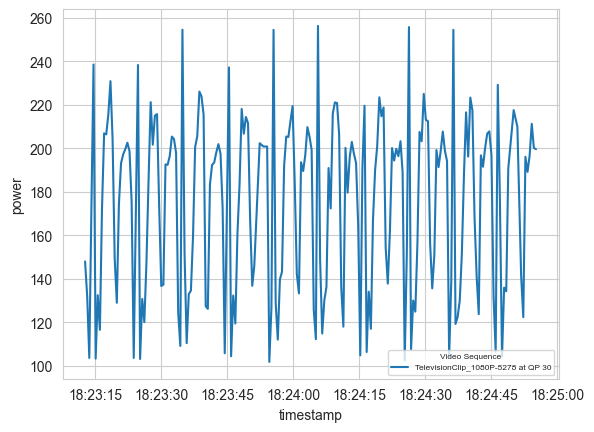

QP level: 36


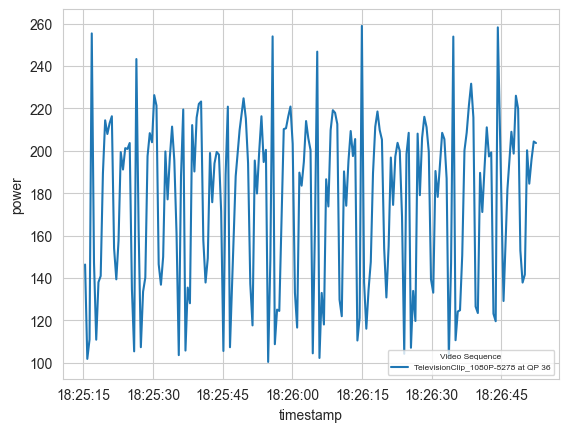

QP level: 42


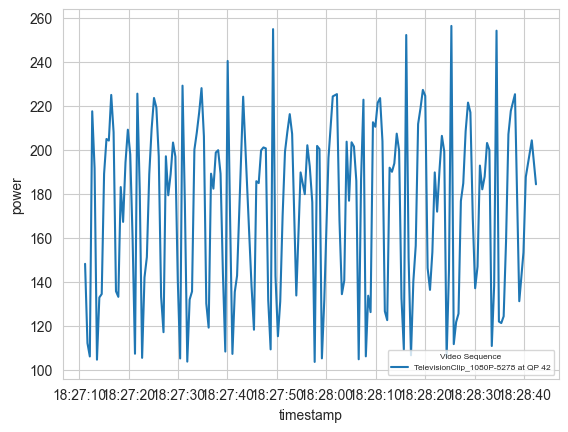

QP level: 48


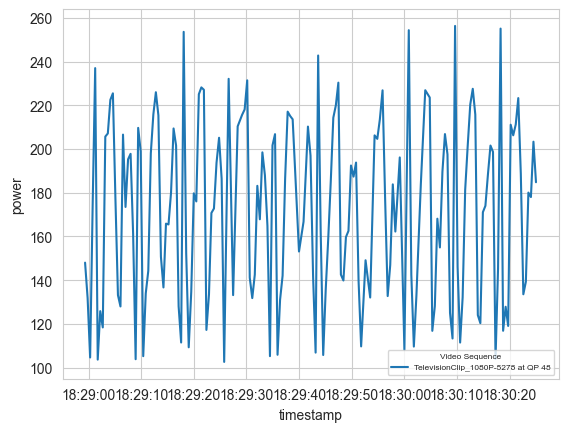

QP level: 54


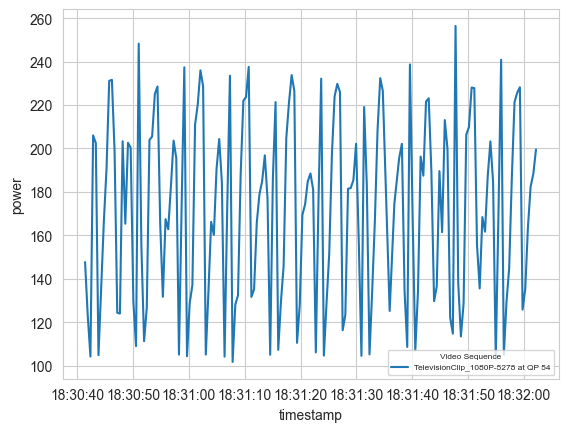

QP level: 60


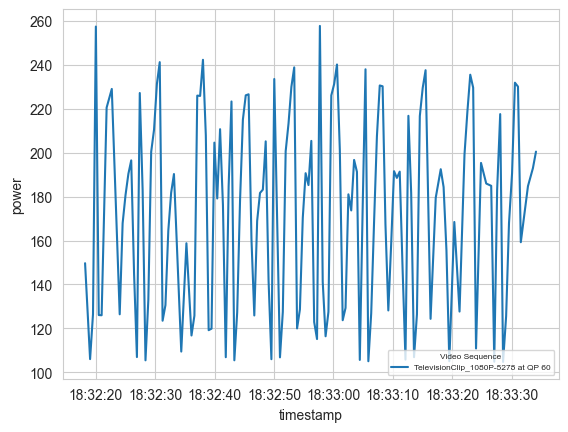

TelevisionClip_1080P-68c6
QP level: 12


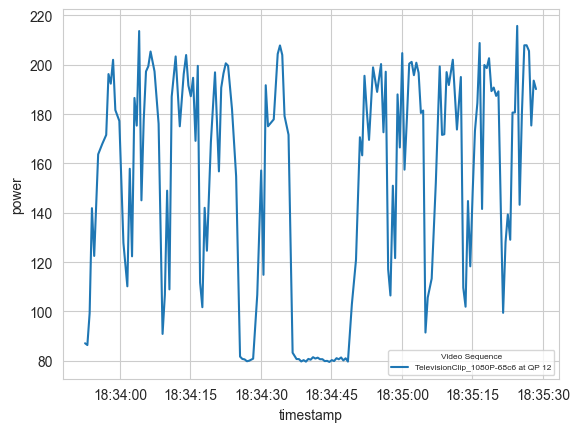

QP level: 18


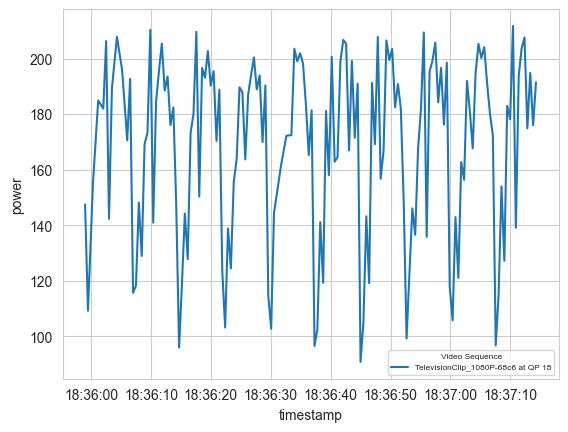

QP level: 24


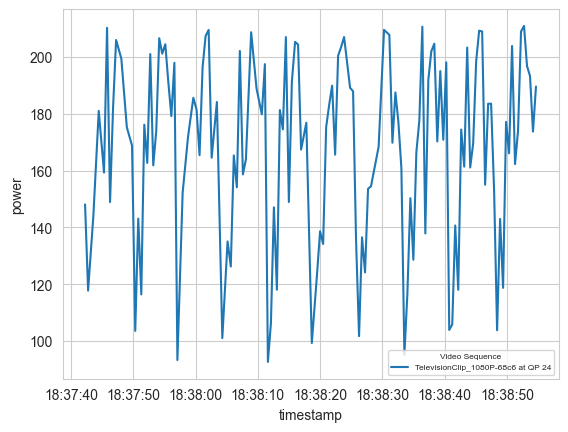

QP level: 30


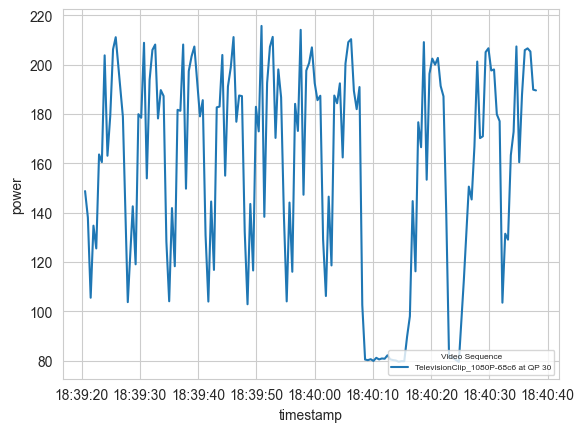

QP level: 36


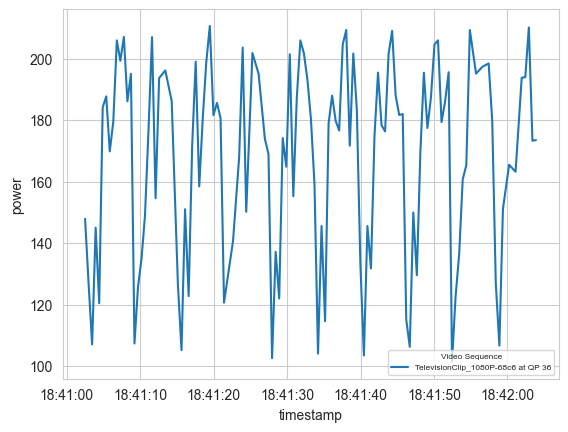

QP level: 42


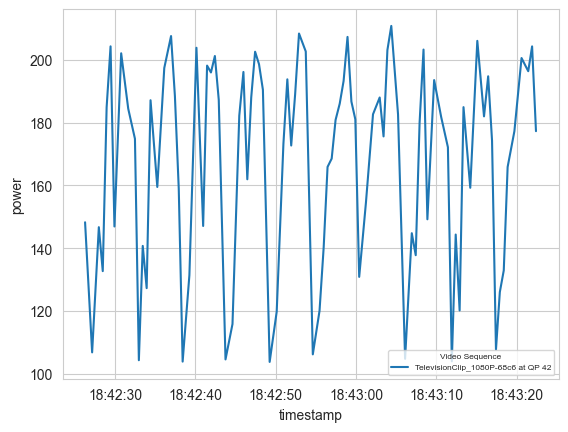

QP level: 48


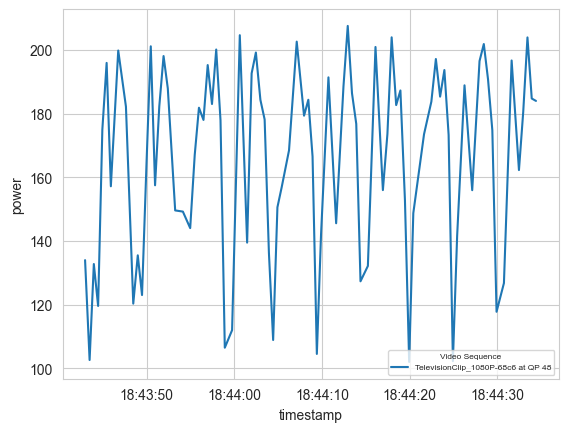

QP level: 54


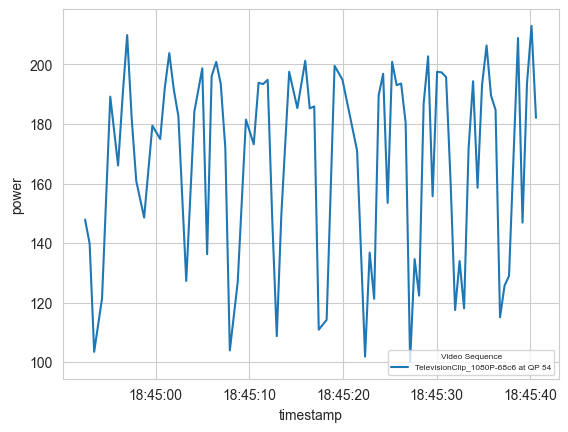

QP level: 60


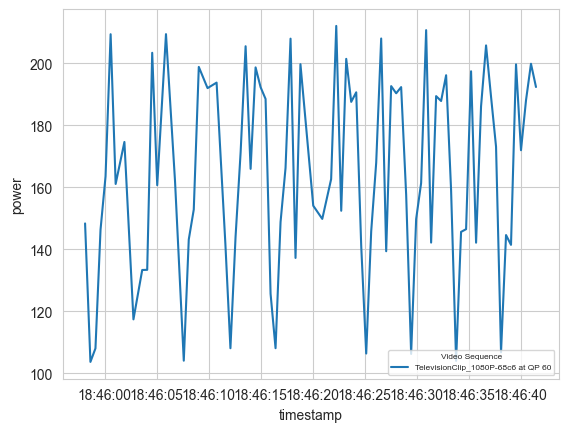

In [617]:
for i in range(len(vid_uniques)):
    metrics_sort = metrics[metrics['vid'] == vid_uniques[i]]
    metrics_sort = metrics_sort.reset_index(drop=True)
    print(vid_uniques[i])

    for j in range(len(metrics_sort)):
        QP = metrics_sort['QP'][j]
        print(f'QP level: {QP}')
        s_e = metrics_sort['start_time_encode'][j]
        e_e = metrics_sort['end_time_encode'][j]
        encode_power, encode_time = get_nearest_power(power_log, s_e, e_e)
        # print(encode_power)
        # print(encode_time)
        x = encode_time
        y = encode_power

        label_name = f'{vid_uniques[i]} at QP {QP}'
        plt.plot(x, y, label=label_name)
        # plt.scatter(x, y)
        plt.legend(loc='lower right', title='Video Sequence', fontsize=6, title_fontsize=6)
        plt.xlabel('timestamp')
        plt.ylabel('power')

        fig_path = f'../fig/power_time_plots/{vid_uniques[i]}_QP{QP}.png'
        fig = plt.gcf() # gcf: Get Current Figure
        fig.savefig(fig_path, dpi=600)

        plt.show()
        plt.close()

In [618]:
# calculate the error
# for normal distribution
# S: sample standard deviation, P: sample mean, n: sample count, alpha: size of the confident interval(error)
# t(alpah/2): finished task (normal distribution)
# fisher'exact test
# T distribution table (t table, signigicance level(alpha/2))

# scipy stats: calculate t statistics

In [619]:
# def CutHour(time):
#     """截取时分秒"""
#     new_time = str(time)
#     hour = new_time[11:19]
#     return "".join(hour)

# formated_time_list = []
# for i in range(len(time_list)):
#     dt = CutHour(time_list[i])
#     timestamp = datetime.strptime(dt, '%H:%M:%S')
#     print(timestamp)
#     # timestamp = timestamp.timestamp()
#     # print(timestamp)
#     formated_time_list.append(timestamp)
# print(formated_time_list)
# for i in range(len(time_list)):
#     dt = datetime.strptime(str(time_list[i]), format)
#     timestamp = dt.timestamp()
#     print(timestamp)
#     formated_time_list.append(timestamp)